In [1]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [30]:
import pandas as pd
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer

In [75]:
from libs.datasets import getDatasets
from libs.grid_baseline1 import labelEncoder, grid

In [76]:
task = 'TI'
datasets = getDatasets(task,'df')


In [77]:
def get(task = None, dataset_name = None):
    if task == None:
        return False
    
    results = []
    
    datasets = getDatasets(task,'df')
    
    if dataset_name != None:
        datasets = datasets[datasets.dataset_name==dataset_name]
    
    for i in datasets.iterrows():    
        name = i[1]['dataset_name']
        label = task
        print("Dataset: {0} and task: {1}".format(name, label))
        print()
        ds_path = i[1]['path']

        # load training and test dataframes
        training_path = ds_path + '/' + i[1]['training']
        test_path = ds_path + '/' +  i[1]['test']
        
        df_training = pd.read_csv(training_path)#, usecols=cols)
        df_test = pd.read_csv(test_path)#, usecols=cols)

        print('training set: ', df_training.shape)        
        print(df_training.groupby([label]).size())
        print()
        print('test set: ', df_test.shape)        
        print(df_test.groupby([label]).size())
        print()
        # df_training.groupby([label]).size().plot(kind='bar',title='Corpus '+name+' training dataset classes distributions')
        
        X_train = df_training['text'].values
        y_train, _ = labelEncoder(df_training[label].values)

        X_test = df_test['text'].values
        y_test, n_classes = labelEncoder(df_test[label].values) 
        
        return X_train, y_train, X_test, y_test, n_classes

In [78]:
X_train, y_train, X_test, y_test, n_classes = get('TI','b5post')

Dataset: b5post and task: TI

training set:  (652, 3)
TI
no     390
yes    262
dtype: int64

test set:  (163, 3)
TI
no     101
yes     62
dtype: int64



### B5post - relig
Best parameters set:

	clf__C: 10000.0    
	clf__penalty: 'l2'    
	vect__max_df: 0.8    
	vect__max_features: None

In [79]:
vect = CountVectorizer(max_df=0.8, max_features=None)
Tfidf = TfidfTransformer()

In [80]:
X_train.shape

(652,)

In [81]:
vect_matrix = vect.fit_transform(X_train)
X_train_tfidf = Tfidf.fit_transform(vect_matrix)
X_train_tfidf.shape

/usr/local/lib/python3.5/dist-packages/sklearn/feature_extraction/text.py:1089: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  # We need to convert X to a matrix, so that the indexing


(652, 66250)

In [82]:
sm = SMOTE(random_state=12, ratio = 1.0)
X_train_res, y_train_res = sm.fit_sample(X_train_tfidf, y_train)

In [83]:
X_train.shape, y_train.shape

((652,), (652,))

In [84]:
X_train_res.shape, y_train_res.shape

((780, 66250), (780,))

In [85]:

pd.DataFrame(y_train_res).groupby([0]).size()

0
0    390
1    390
dtype: int64

In [86]:
# grid(X_train_res, X_test, y_train_res, y_test, n_classes)

In [87]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

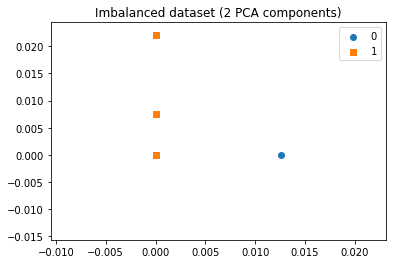

In [99]:
# from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

#pca = PCA(n_components=2)
#X = pca.fit_transform(X_train)
y = y_train_res
plot_2d_space(X_train_res.toarray(), y, 'Imbalanced dataset (2 PCA components)')

In [89]:
from sklearn.decomposition import Parallel

ImportError: cannot import name 'Parallel'